In [66]:
import sys
import os
from importlib import reload
import numpy as np
import pylab as pl
from osgeo import gdal
from osgeo import ogr
import skimage
from matplotlib.colors import ListedColormap

sys.path.insert(0, 'C:/Users/Almadina Computers/Sattelite/DeforestationMap/src')
import geotiff.dataset.data_augment as dtaug
import geotiff.dataset.rasterizer as rstzr
import geotiff.dataset.preprocessor as prep
import geotiff.dataset.dataset_generator as ds_gen
import geotiff.common.visualization as vis
import dataset.random_chips as rdmchips
import dataset.sequential_chips as seqchips

reload(dtaug)
reload(rstzr)
reload(prep)
reload(ds_gen)

%matplotlib inline

In [67]:
DATA_DIR = "C:/Users/Almadina Computers/Sattelite/DeforestationMap/generated/newgenerated" 
shape_file = os.path.join(DATA_DIR, 'Manshehra.shp') 
raster_file = os.path.join(DATA_DIR, 'image_2020_Manshehra.TIF')

#classes_names = ["afforestation","deforestation", "degradation", "other_area"] 
#classes_of_interest = ['afforestation','deforestation', 'degradation', 'forest' 'other_area'] 
class_column = 'class_name' 
#non_class = "no data"

output_path = "C:/Users/Almadina Computers/Sattelite/DeforestationMap/generated/newfiles/datasample/single_file" 
out_labels = os.path.join(output_path, 'labels.TIF') 
output_shp = os.path.join(output_path, "samples.shp")
output_png = os.path.join(output_path)
output_npz = os.path.join(output_path, "samples_dataset.npz")

#number_of_samples = 100 
#window_size = 100 
#output_disk = os.path.join(output_path, 'dataset_%dx%d_def' % (window_size, window_size)) 
#file_name = 'dataset'

In [68]:
#raster_img = gf.load_image(raster_file) #TODO - Review this method (issue #5)
#raster_ds = gdal.Open(raster_file)
#raster_img = raster_ds.ReadAsArray()
#raster_img = np.rollaxis(raster_img, 0, start=3)
#print(raster_img.shape)

In [69]:
#pl.figure(figsize=(5,5))
#pl.title('RGB Composition')
#raster_img = skimage.img_as_float(raster_img).astype(np.float32)
#pl.imshow(raster_img[:,:,[5, 4, 3]])
#pl.axis('off')

In [70]:
rasterizer = rstzr.Rasterizer(shape_file,
                              raster_file,
                              class_column)
#                              classes_interest=classes_names,
#                              non_class_name=non_class)
rasterizer.collect_class_names()
rasterizer.rasterize_layer()
class_names = ['no data'] + rasterizer.get_class_names()
rasterized_labels = rasterizer.get_labeled_raster()

In [71]:
rasterizer.save_labeled_raster_to_gtiff(out_labels)

In [72]:
print("Class Names: ", class_names)
print("Raster Shape:", rasterized_labels.shape)
print('unique: ', np.unique(rasterized_labels))

Class Names:  ['no data', 'afforestation', 'deforestation', 'degradation', 'forest', 'other_area']
Raster Shape: (3596, 4993, 1)
unique:  [1 2 3 4 5 --]


In [73]:
#vis.plot_labels(rasterized_labels, class_names, colors=["darkgreen", "yellow", "orange", "red"])

Raster Shape: (3596, 4993, 1)


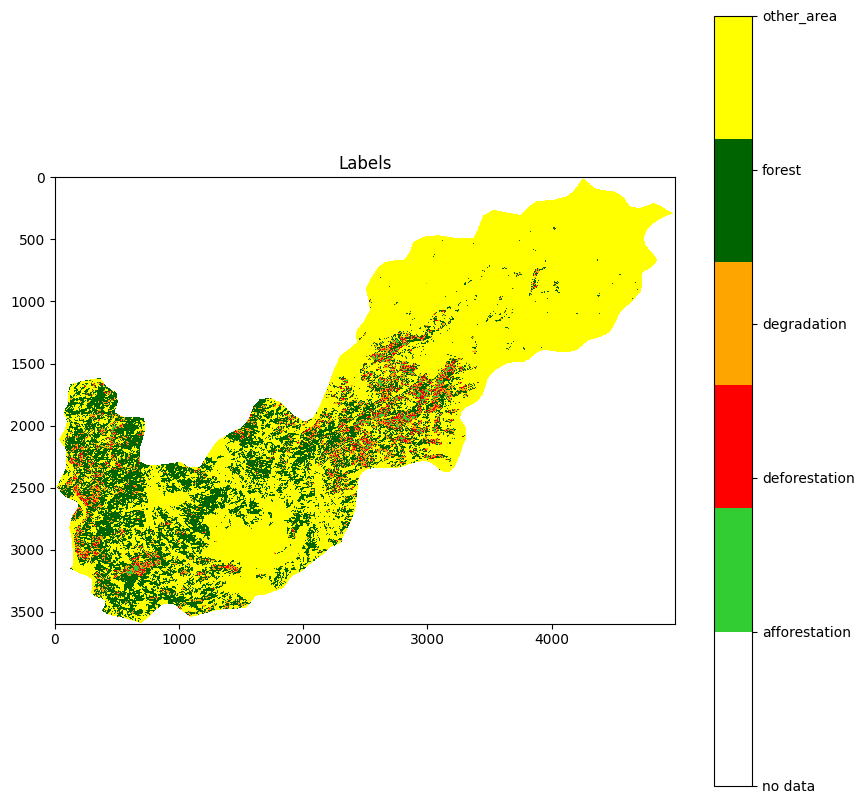

In [74]:
pl.figure(figsize=(10,10))
pl.title('Labels')
print("Raster Shape:", rasterized_labels.shape)
labels = np.ma.masked_where(rasterized_labels == 255, rasterized_labels)

colorMap = ListedColormap(["limegreen", "red", "orange", "darkgreen", "yellow"])
#pl.imshow(rasterized_labels, cmap=colorMap)
pl.imshow(rasterized_labels[:,:,0], cmap=colorMap)
cbar = pl.colorbar()

# Adjust the ticks of the colorbar
cbar.set_ticks(np.arange(len(class_names)))

# Set the tick labels to the class names
cbar.set_ticklabels(class_names)


#cbar.ax.get_yaxis().set_ticks([])

#for j, lab in enumerate(class_names):
#    cbar.ax.text(1.5, (8 * j + 9.5) / 10, lab, ha='left')
    
#cbar.ax.get_yaxis().labelpad = 15

In [75]:
#rasterizer = rstzr.Rasterizer(shape_file,
#                              raster_file,
#                              class_column,
#                              classes_interest=classes_of_interest,
#                              non_class_name=non_class)
#rasterizer.collect_class_names()
#rasterizer.rasterize_layer()
#class_names = rasterizer.get_class_names()
#rasterized_layer = rasterizer.get_labeled_raster()

In [76]:
#rasterizer.save_labeled_raster_to_gtiff(out_labels)

In [77]:
#print("Class Names: ", class_names)
#print("Raster Shape:", rasterized_layer.shape)
#print('unique: ', np.unique(rasterized_layer))

In [78]:
#vis.plot_labels(rasterized_layer, class_names, colors=["darkgreen", "yellow", "orange", "red"])

In [79]:
#pl.figure(figsize=(10, 10))
#pl.title('Labels')
#print("Raster Shape:", rasterized_layer.shape)
#labels = np.ma.masked_where(rasterized_layer == 255, rasterized_layer)

#colorMap = ListedColormap(["darkgreen", "yellow", "orange", "red"])
#pl.imshow(rasterized_layer[:,:,0], cmap=colorMap)
#cbar = pl.colorbar()
#cbar.ax.get_yaxis().set_ticks([])

#for j, lab in enumerate(class_names):
#    cbar.ax.text(1.5, (20 * j + 20) / 20, lab, ha='left')

#cbar.ax.get_yaxis().labelpad = 15

SHAPE:  (3596, 4993, 7)


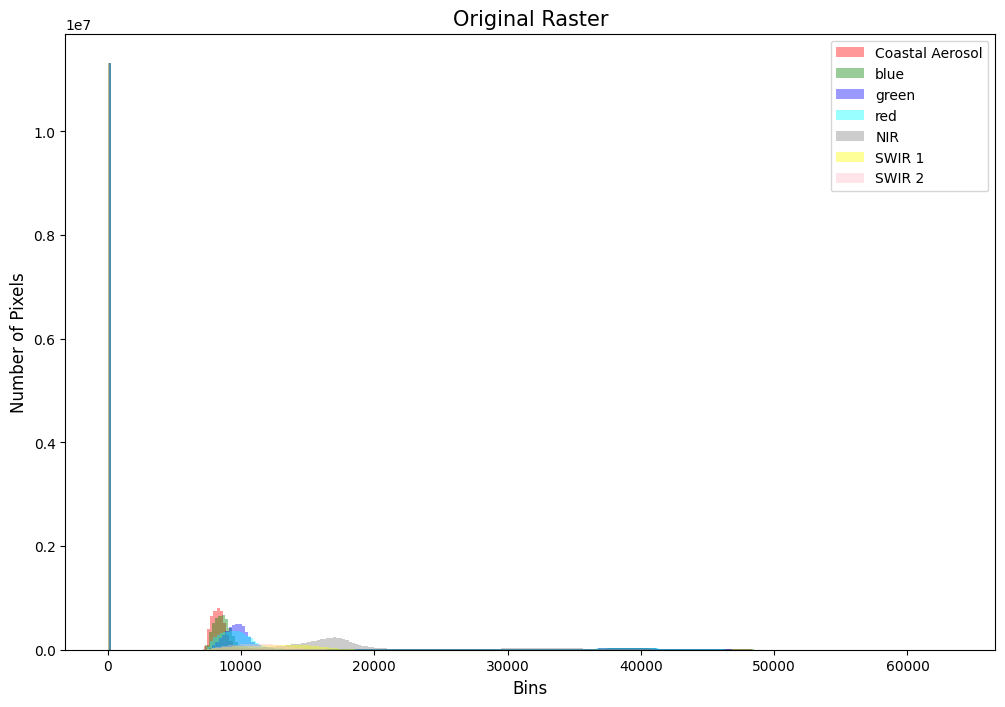

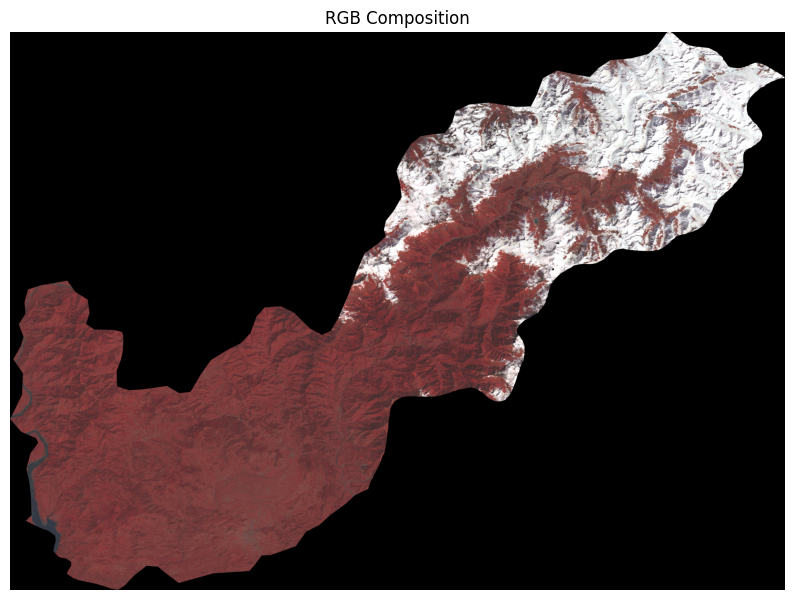

In [80]:
preproc = prep.Preprocessor(raster_file, rasterized_labels, no_data=-9999)
preproc.set_nodata_value(-10)
original_raster = preproc.get_array_stacked_raster()
print("SHAPE: ", original_raster.shape)
# print("UNIQUE: ", np.unique(original_raster))

vis.plot_image_histogram(original_raster, cmap=["red", "green", "blue", "cyan", "gray", "yellow", "pink"],
                         title="Original Raster", legend=["Coastal Aerosol", "blue", "green", "red", "NIR", "SWIR 1", "SWIR 2"])
vis.plot_rgb_img(original_raster, bands=[4,3,2], contrast=True)

DTYPE:  float32


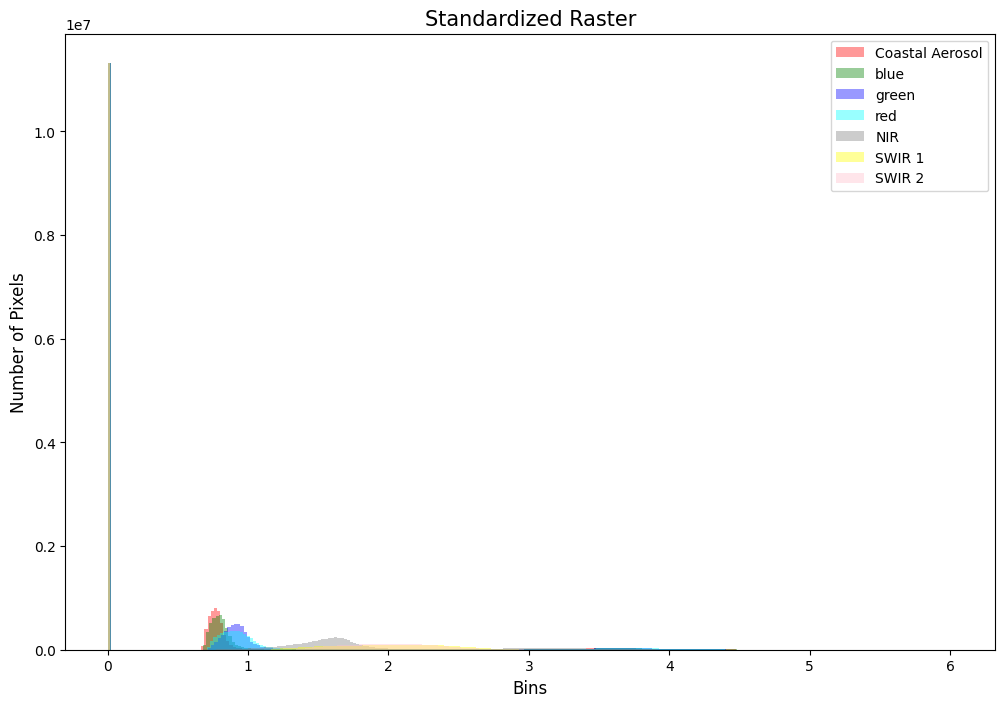

In [81]:
preproc.standardize_image("median_std")
raster_img = preproc.get_array_stacked_raster()
print("DTYPE: ", raster_img.dtype)
#print(np.unique(raster_img))
vis.plot_image_histogram(raster_img, cmap=["red", "green", "blue", "cyan", "gray", "yellow", "pink"],
                         title="Standardized Raster", legend=["Coastal Aerosol", "blue", "green", "red", "NIR", "SWIR 1", "SWIR 2"])

In [82]:
print("DTYPE: ", raster_img.dtype)

DTYPE:  float32


In [50]:
#reload(seqchips)
#chips_seq = seqchips.SequentialChipGenerator(params).generate_chips()
#bands = ['SR_B1', 'SR_B2', 'SR_B3', 'SR_B4', 'SR_B5', 'SR_B6', 'SR_B7']
bands = ['Band_1', 'Band_2', 'Band_3', 'Band_4', 'Band_5', 'Band_6', 'Band_7']
#stacking_years = 2
#sensor = 'OLI/TIRS'
window_size = 224 
ds_no_data = -10
indexes_to_compute = 'number_of_samples'
standardization = 'reduce_sr'
tolerance_nodata = 0.999
raster_file = 'raster_file'
dataset_description = {'standardization': standardization,
#                        'range': norm_range,
                       'spectr_indexes': indexes_to_compute,
                       'bands': bands,
#                       'sensor': sensor,
                       'classes': class_names,
                       'tolerance_nodata': tolerance_nodata,
                       'notes': 'Removing all chips with more than 50% of no data values.'}

In [51]:
reload(ds_gen)
generator = ds_gen.DatasetGenerator(raster_img, rasterized_labels, description=dataset_description)
params = {'win_size': window_size}
generator.generate_chips(params)
chips_struct = generator.get_samples()
#generator.save_samples_NPZ(output_npz)

  -> Generating chips...


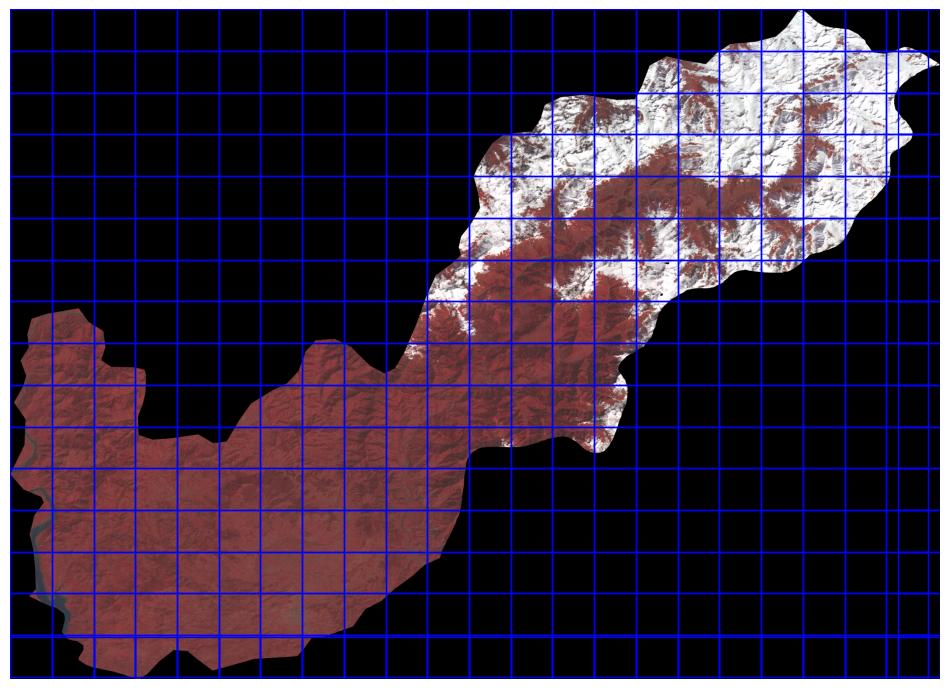

In [52]:
vis.plot_chips(chips_struct, raster_img, bands=[4, 3, 2], contrast=True)

In [53]:
generator.remove_no_data(tolerance=tolerance_nodata)
chip_struct = generator.get_samples()

  -> Removing no data chips...


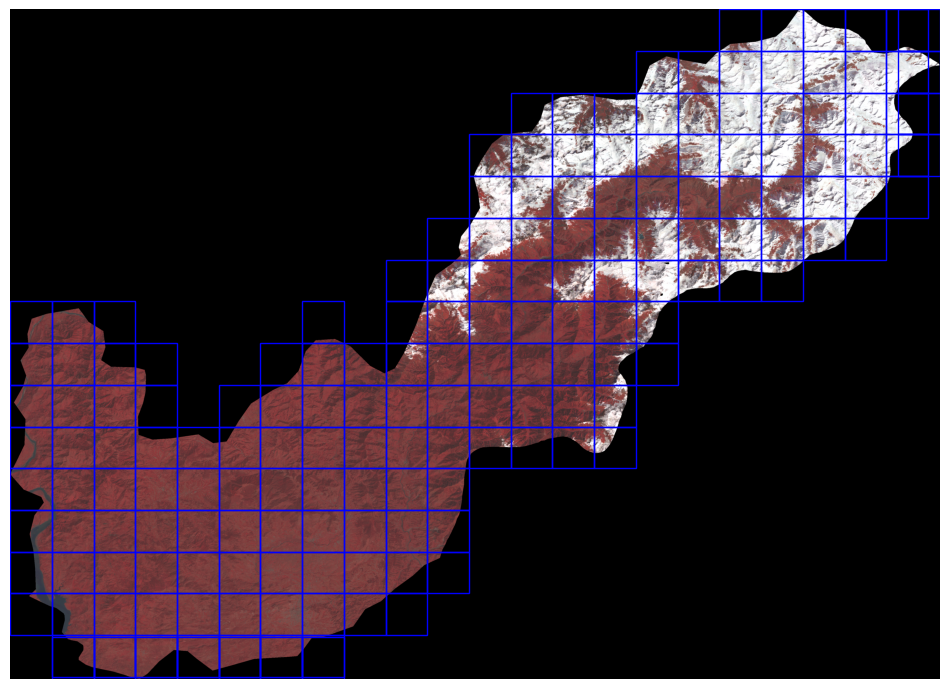

In [54]:
vis.plot_chips(chips_struct, raster_img, bands=[4, 3, 2], contrast=True)

In [55]:
#generator.shuffle_ds()
#generator.split_ds()
#generator.save_to_disk(output_disk, file_name)

In [56]:
print("Generated ", len(chips_struct["labels"]), " label samples.")
print("Generated ", len(chips_struct["chips"]), " image samples.")
print("Generated ", len(chips_struct['coords']), " coords samples.")

Generated  180  label samples.
Generated  180  image samples.
Generated  180  coords samples.


In [57]:
#print("Generated ", len("dataset_test.tfrecord"), " test dataset.")
#print("Generated ", len("dataset_train.tfrecord"), " train dataset.")
#print("Generated ", len("dataset_valid.npz"), " validation dataset.")

In [58]:
#print("Generated ", len("train_chips"), " train chips.")
#print("Generated ", len("test_chips"), " test chips.")
#print("Generated ", len('val_chips'), " val chips.")
#print("Generated ", len("train_labels"), " train labels.")
#print("Generated ", len("test_labels"), " test labels.")
#print("Generated ", len('val_labels'), " val labels.")

In [59]:
print('Images shape: ', chips_struct["chips"][0].shape, ' - DType: ', chips_struct["chips"][0].dtype)
print('Labels shape: ', chips_struct["labels"][0].shape, ' - DType: ', chips_struct["labels"][0].dtype)

Images shape:  (224, 224, 7)  - DType:  float32
Labels shape:  (224, 224, 1)  - DType:  int32


In [60]:
import tensorflow as tf
from shutil import rmtree

In [61]:
new_dataset = {}
new_dataset["images"] = chips_struct["chips"]
new_dataset["labels"] = chips_struct["labels"]

angles = [90, 180, 270]
rotated_imgs = dtaug.rotate_images(chips_struct["chips"], angles)
#flipped_imgs = dtaug.flip_images(chips_struct["chips"])

new_dataset["images"] = np.concatenate((new_dataset["images"], rotated_imgs))
#new_dataset["images"] = np.concatenate((new_dataset["images"], flipped_imgs))

rotated_lbls = dtaug.rotate_images(chips_struct["labels"], angles)
#flipped_lbls = dtaug.flip_images(chips_struct["labels"])

new_dataset["labels"] = np.concatenate((new_dataset["labels"], rotated_lbls)).astype(np.int32)
#new_dataset["labels"] = np.concatenate((new_dataset["labels"], flipped_lbls))

#new_dataset["classes"] = samples["classes"]

print("Data Augmentation Applied:")
print("  -> Images: ", new_dataset["images"].shape)
print("  -> Labels: ", new_dataset["labels"].shape)

Data Augmentation Applied:
  -> Images:  (720, 224, 224, 7)
  -> Labels:  (720, 224, 224, 1)


In [62]:
print('Images shape: ', new_dataset["images"][0].shape, ' - DType: ', new_dataset["images"][0].dtype)
print('Labels shape: ', new_dataset["labels"][0].shape, ' - DType: ', new_dataset["labels"][0].dtype)

Images shape:  (224, 224, 7)  - DType:  float32
Labels shape:  (224, 224, 1)  - DType:  int32


In [63]:
print("Generated ", len(new_dataset["images"]), " label samples.")
print("Generated ", len(new_dataset["labels"]), " image samples.")

Generated  720  label samples.
Generated  720  image samples.


In [64]:
#pl.figure(figsize=(15,15))
#colorList = ["gray","darkgreen", "yellow", "orange", "red"]
#count = 1
#for x in range(1, 10):
#    pos = np.random.randint(len(new_dataset["images"]))
#    smpImg = new_dataset["images"][pos]
#    pl.subplot(5, 5, count)
#    pl.title("%s %d" % ("image ", pos))
#    pl.axis('off')
#    pl.imshow(smpImg[:,:,[5,4,3]], cmap=colorMap, interpolation='nearest')
#    count=count+1
    
#    lblImg = new_dataset["labels"][pos]
#    pl.subplot(5, 5, count)
#    pl.title("%s %d" % ("label ", pos))
#    pl.axis('off')
    # Mounting the color map for this sample
#    palette = []
#    for val in np.unique(lblImg):
#        if not val == 255:
#            print("VAL: ", val)
#            print("ColorList[val]: ", colorList[val])
#            palette.append(colorList[val])
#    colorMap = ListedColormap(palette)
#    pl.imshow(lblImg[:,:,0], interpolation='nearest', cmap=colorMap)
#    count=count+1

ValueError: Floating point image RGB values must be in the 0..1 range.

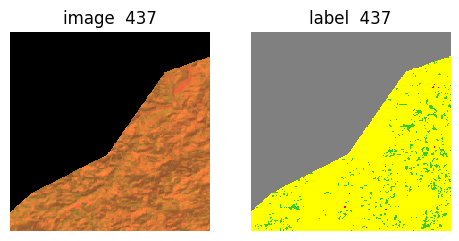

In [65]:
pl.figure(figsize=(15,15))
colorList = ["gray", "limegreen", "red", "orange", "darkgreen", "yellow"]
count = 1
for x in range(1, 20):
    pos = np.random.randint(len(new_dataset["images"]))
    smpImg = new_dataset["images"][pos]
    pl.subplot(5, 5, count)
    pl.title("%s %d" % ("image ", pos))
    pl.axis('off')
    pl.imshow(smpImg[:,:,[6,4,1]], cmap=colorMap, interpolation='nearest')
    count=count+1
    lblImg = new_dataset["labels"][pos]
    pl.subplot(5, 5, count)
    pl.title("%s %d" % ("label ", pos))
    pl.axis('off')
# Mounting the color map for this sample
    palette = []
    for val in np.unique(lblImg):
         if not val == 255:
            #print("VAL: ", val)
            #print("ColorList[val]: ", colorList[val])
            palette.append(colorList[val])
    colorMap = ListedColormap(palette)
    pl.imshow(lblImg[:,:,0], interpolation='nearest', cmap=colorMap)
    count=count+1
    output_png = os.path.join(output_path)
    count = 1
# for x in range(1, 5):
# pos = np.random.randint(len(new_dataset["images"]))
    samplesDir = os.path.join(output_png, 'sample_imgs')
    labelsDir = os.path.join(output_png, 'sample_labels')
    samplefile = 'images' + str(pos) + '.png'
    labelsfile = 'labels' + str(pos) + '.png'
    count=count+1
    if (colorMap is None):
        imageio.imsave(os.path.join(samplesDir,samplefile),new_dataset["images"][pos][:, :, 0])
# imageio.imsave(os.path.join(labelsDir,labelsfile),new_dataset["labels"][pos][:, :, 0])
    else:
        pl.imsave(os.path.join(samplesDir, samplefile),new_dataset["images"][pos][:, :, [4,3,2]], cmap=colorMap)
        pl.imsave(os.path.join(labelsDir, labelsfile), new_dataset["labels"][pos][:, :, 0], cmap=colorMap)
    count=count+1
